#Ejercicio Regresión Logística

Implementar el modelo de regresión logística en el Dataset titanic.csv para predecir que personas hubieran sobrevivido (Usar Sklearn).



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/titanic.csv')

In [ ]:
data.shape

(891, 12)

In [ ]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C
441,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5000,NaN,S
420,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C


In [ ]:
#Se remueve algunas columnas que en ppio no son necesarias

data.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [ ]:
data.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
765,1,1,female,51.0,1,0,77.9583
738,0,3,male,NaN,0,0,7.8958
473,1,2,female,23.0,0,0,13.7917
270,0,1,male,NaN,0,0,31.0000
104,0,3,male,37.0,2,0,7.9250


In [ ]:
data.shape

(891, 7)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
#se llenan valores faltantes de la columna años, por valores promedios
#con SimpleImputer sustituyo los valores null por otras variables

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
data.loc[data['Survived']==1,['Age']]=imp.fit_transform(data.loc[data['Survived']==1,['Age']])
data.loc[data['Survived']==0,['Age']]=imp.fit_transform(data.loc[data['Survived']==0,['Age']])

In [ ]:
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

In [ ]:
#data=pd.get_dummies(data, drop_first=True)
data=pd.get_dummies(data)

In [ ]:
#data['Family_size']=data['SibSp'] + data['Parch']
#data.drop(['SibSp', 'Parch'] ,axis=1, inplace=True)
#data.head()
data['Family_size']=data['SibSp'] + data['Parch']
data.drop(['SibSp', 'Parch'] ,axis=1, inplace=True)
data.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Family_size
0,0,3,22.0,7.2500,0,1,1
1,1,1,38.0,71.2833,1,0,1
2,1,3,26.0,7.9250,1,0,0
3,1,1,35.0,53.1000,1,0,1
4,0,3,35.0,8.0500,0,1,0


In [ ]:
#X me trae todas las filas y las columnas desde la posición 2 hasta el final
#y me trae todas las filafs y solo la primer columna

X=data.iloc[:,1:]
y=data.iloc[:,0]

In [ ]:
X.shape

(891, 5)

In [ ]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
#Implementando modelo RL con Sklearn
#Analizamos desempeño con validación cruzada (cross validation),
#Curvas aprendizaje (learning curves),
#Curvas validación (validation curves),

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, cross_val_score , validation_curve

In [ ]:
X.head()

,Pclass,Age,Fare,Sex_male,Family_size
0,3,22.0,7.2500,1,1
1,1,38.0,71.2833,0,1
2,3,26.0,7.9250,0,0
3,1,35.0,53.1000,0,1
4,3,35.0,8.0500,1,0


In [ ]:
#Se normalizan los datos con StandardScaler
#Se realiza una simple interaccion entre caracterisitcas con PolynomialFeactures

model = Pipeline((
      ('scale', StandardScaler()),  ('poly', PolynomialFeatures(degree=2)), ('logreg', LogisticRegression(C=50, solver='liblinear'))
))

In [ ]:
#Observo las curvas de validación (validation Curves)

scores = cross_val_score(model, X, y, cv=7)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.818 +/- 0.026


In [ ]:
#(Valor_inicial,num_valores,valor_final)
param_range=np.hstack([np.arange(0.01,1.0,0.03), np.linspace(1.1,100,20)])
#train_score, test_score=validation_curve(model, X, y, param_name='logreg__C', params=params, cv=7,scoring='accuracy', n_jobs=-1)

In [ ]:
train_score, test_score=validation_curve(model, X, y, param_name='logreg__C', param_range=param_range, cv=7,scoring='accuracy', n_jobs=-1)

(0.8, 0.84)

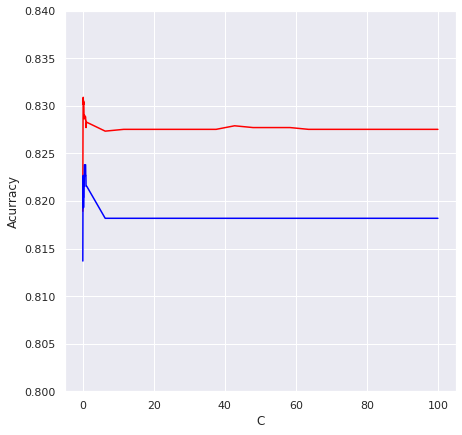

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(param_range, np.mean(train_score,1), color='red')
plt.plot(param_range, np.mean(test_score,1), color='blue')
plt.xlabel('C')
plt.ylabel('Acurracy')
plt.ylim(0.8,0.84)

In [ ]:
#Curvas_aprendizaje
N, train_score, test_score=learning_curve(model,X,y, train_sizes=np.linspace(0.1,1,25), cv=7, scoring='accuracy', n_jobs=-1)

Text(0, 0.5, 'Acurracy')

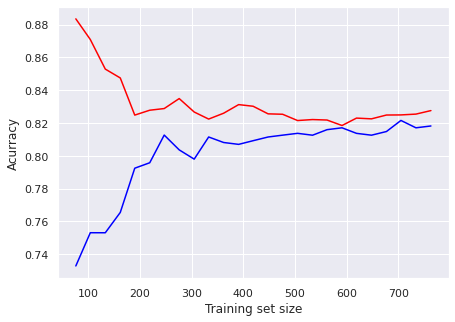

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(N,np.mean(train_score,1), color='red')
plt.plot(N,np.mean(test_score,1), color='blue')
plt.xlabel('Training set size')
plt.ylabel('Acurracy')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (579, 5) (579,)
Test set: (312, 5) (312,)


In [ ]:
model.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('logreg', LogisticRegression(C=50, solver='liblinear'))])

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
model.score(X_train,y_train)

0.8497409326424871

In [ ]:
model.score(X_test,y_test)

0.7692307692307693

In [ ]:
X_test.head(6)

,Pclass,Age,Fare,Sex_male,Family_size
725,3,20.000000,8.6625,1,0
861,2,21.000000,11.5000,1,1
528,3,39.000000,7.9250,1,0
46,3,30.626179,15.5000,1,1
627,1,21.000000,77.9583,0,0
357,2,38.000000,13.0000,0,0


In [ ]:
import pandas as pd

datos = {
    "Pclass":[3],
    "Age":[27.000000],
    "Fare":[77.9583],
    "Sex_male":[1],
    "Family_size":[5]
}

df = pd.DataFrame(datos)
X_new = df
y_proba = model.predict(X_new)
y_proba.round(2)

array([0])

In [ ]:
#X_new = X_test[:5]
#y_proba = model.predict(X_new)
#y_proba.round(2)

In [ ]:
y_proba2 = np.argmax(model.predict(X_new), axis=-1)
y_proba2

0

In [ ]:
X_new.iloc[0]

Pclass          3.0000
Age            27.0000
Fare           77.9583
Sex_male        1.0000
Family_size     5.0000
Name: 0, dtype: float64

#Ejercicio Gradiente de Descenso



In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/FuelConsumption.csv')

In [ ]:
data.shape

(1067, 13)

In [ ]:
data.isnull().any()

MODELYEAR                   False
MAKE                        False
MODEL                       False
VEHICLECLASS                False
ENGINESIZE                  False
CYLINDERS                   False
TRANSMISSION                False
FUELTYPE                    False
FUELCONSUMPTION_CITY        False
FUELCONSUMPTION_HWY         False
FUELCONSUMPTION_COMB        False
FUELCONSUMPTION_COMB_MPG    False
CO2EMISSIONS                False
dtype: bool

In [ ]:
data.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
684,2014,LINCOLN,MKZ AWD,MID-SIZE,3.7,6,AS6,X,13.1,9.3,11.4,25,262
93,2014,BMW,428i xDRIVE COUPE,COMPACT,2.0,4,A8,Z,10.6,7.2,9.1,31,209
726,2014,MERCEDES-BENZ,C 350,COMPACT,3.5,6,AS7,Z,12.0,8.6,10.5,27,242
874,2014,PORSCHE,911 CARRERA 4S CABRIOLET,MINICOMPACT,3.8,6,M7,Z,12.9,9.1,11.2,25,258
505,2014,HYUNDAI,ELANTRA GT,MID-SIZE,2.0,4,M6,X,9.8,7.0,8.5,33,196


In [ ]:
X=data.loc[:,['ENGINESIZE','FUELTYPE','FUELCONSUMPTION_CITY']]
y = data['CO2EMISSIONS']

In [ ]:
X=pd.get_dummies(X, drop_first=True)

In [ ]:
X.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2.0,9.9,0,0,1
1,2.4,11.2,0,0,1
2,1.5,6.0,0,0,1
3,3.5,12.7,0,0,1
4,3.5,12.1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [ ]:
X_train.shape

(853, 5)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [ ]:
model = Pipeline((
      ('scale', StandardScaler()),  ('poly', PolynomialFeatures(degree=2)), ('linear_regression', LinearRegression() )
))

In [ ]:
model.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [ ]:
y_fit=model.predict(X_test)
r2_score(y_test,y_fit)

0.9905292971987586

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import validation_curve

In [ ]:
model = Pipeline((
      ('scale', StandardScaler()),  ('poly', PolynomialFeatures(degree=2)), ('SGD', SGDRegressor(max_iter=1000, penalty=None))
 ))

In [ ]:
params=np.arange(1,100)
train_score, val_score=validation_curve(model, X_train, y_train, param_name='SGD__max_iter', param_range=params, cv=5, n_jobs=-1)

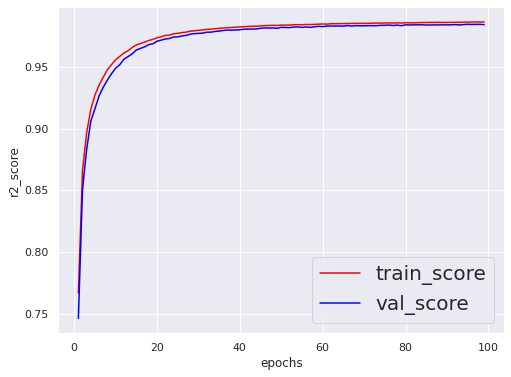

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(params, np.mean(train_score,1), color='red',label='train_score')
plt.plot(params, np.mean(val_score,1), color='blue', label='val_score')
plt.legend( fontsize=20)
plt.xlabel('epochs')
plt.ylabel('r2_score');

In [ ]:
model.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('SGD', SGDRegressor(penalty=None))])

In [ ]:
y_fit=model.predict(X_test)
r2_score(y_test,y_fit)

0.9899808162154257

In [ ]:
#generemos la función de coste cualquiera
import numpy as np
costo = lambda w: np.sin(1/2 * w[0]**2 - 1/4 * w[1]**2 + 3) * np.cos(2*w[0] - np.e**w[1]) #w[0] será el bias

costo([1,2])

0.374762046993176

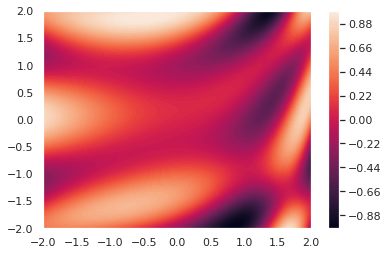

In [ ]:
import matplotlib.pyplot as plt

# veamos su forma:
N = 100
x = np.linspace(-2,2,N)
y = np.linspace(-2,2,N)
z = np.zeros((N,N))

for i,xi in enumerate(x):
  for j,yj in enumerate(y):
    z[i,j] = costo([xi,yj])
  
plt.contourf(x,y,z,100)
plt.colorbar()
plt.show()

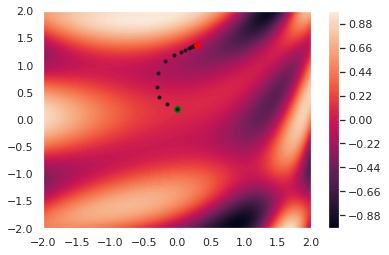

In [ ]:
plt.contourf(x,y,z,100)
plt.colorbar()
np.random.seed(6)

Ws = np.random.rand(2) * 2 - 1
Ws = [0,0.2]
Wc = np.copy(Ws)
h = 0.01
alpha = 0.005
grad = np.zeros(2)

plt.plot(Ws[0],Ws[1],'o',c='green')


for _ in range(100000): #numero de iteraciones que harémos
  for it, w in enumerate(Ws):
    Wc = np.copy(Ws)
    Wc[it] = Wc[it] + h
    derivada = (costo(Wc) -costo (Ws))/h #derivada parcial por diferencias mínimas
    grad[it] = derivada
    
  Ws = Ws - alpha * grad
  
  if _%100 == 0:
    plt.plot(Ws[0],Ws[1], 'k.')
    
plt.plot(Ws[0],Ws[1],'o',c='red')

#Función de Activación

- Ejercicio: Implementar un modelo de red neuronal usando Keras para predecir los sobrevivientes del titanic. El modelo debe tener dos capas ocultas densas con 16 neuronas cada una y funcion de activacion relu. como optimizador usar descenso del gradiente estocástico como función de pérdida usar binary_crossentropy y como métrica usar accuracy. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0],test_size = 0.2, random_state=0)

In [ ]:
X_train.shape

(712, 6)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from tensorflow import keras

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Dense(16,activation='relu', input_shape=(6,)),
                                 keras.layers.Dense(16,activation='relu'),
                                 keras.layers.Dense(1, activation='sigmoid')
])

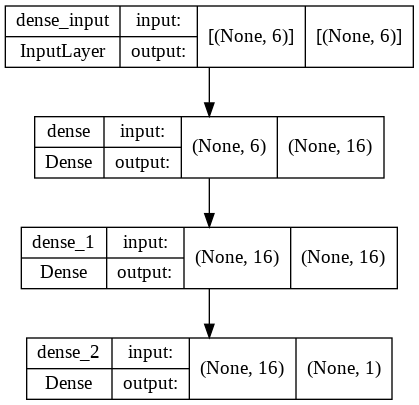

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
history=model.fit(X_train_scaled,y_train, epochs=50, validation_split=0.2)

Epoch 1/50
18/18 [==============================] - 1s 24ms/step - loss: 0.4172 - accuracy: 0.8207 - val_loss: 0.4538 - val_accuracy: 0.8042
Epoch 2/50
18/18 [==============================] - 0s 6ms/step - loss: 0.4170 - accuracy: 0.8207 - val_loss: 0.4542 - val_accuracy: 0.8042
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 0.4171 - accuracy: 0.8207 - val_loss: 0.4540 - val_accuracy: 0.8042
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4170 - accuracy: 0.8207 - val_loss: 0.4544 - val_accuracy: 0.8042
Epoch 5/50
18/18 [==============================] - 0s 7ms/step - loss: 0.4167 - accuracy: 0.8243 - val_loss: 0.4552 - val_accuracy: 0.8042
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4168 - accuracy: 0.8225 - val_loss: 0.4554 - val_accuracy: 0.8042
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4165 - accuracy: 0.8225 - val_loss: 0.4557 - val_accuracy: 0.8042
Epoch 8/50
18/18 [=

In [ ]:
model.evaluate(X_test_scaled,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8324


[0.38406887650489807, 0.832402229309082]

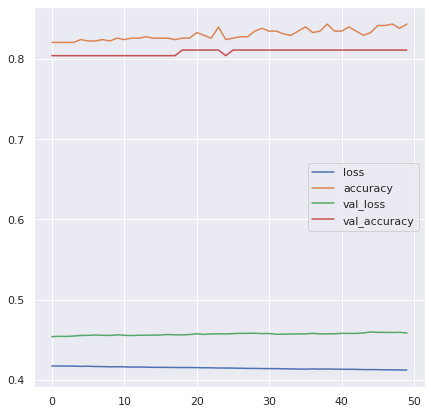

In [ ]:
pd.DataFrame(history.history).plot(figsize=(7,7))